In [45]:
# Complete random movements on environment

import gym
import gym_examples
import numpy as np

env = gym.make('gym_examples/GridWorld-v0', size=4)

state = env.reset()
agent_location = env.get_agent_location()
target_location = env.get_target_location()
print(f"Agent's INITIAL Location: {agent_location}, Target Location: {target_location}")

done = False


while not done:
    # Select action randomly
    action = env.action_space.sample()
    
    # take step, returns transition
    next_state, reward, done, truncated, info = env.step(action)
    
    agent_location = env.get_agent_location()
    target_location = env.get_target_location()
    print(f"Agent's Location: {agent_location}, Target Location: {target_location}")

    #update state
    state = next_state

env.close()

print("Episode finished")


Agent's INITIAL Location: [3 0], Target Location: [0 0]
Agent's Location: [3 0], Target Location: [0 0]
Agent's Location: [3 0], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [2 0], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [1 2], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [2 3], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [1 2], Target Location: [0 0]
Agent's Location: [1 2], Target 

In [43]:
# Deep Q Network
import gym 
import gym_examples
from dqn import Agent
import numpy as np

env = gym.make('gym_examples/GridWorld-v0', size=4)
agent = Agent(gamma=0.9, epsilon=0.5, batch_size=10, n_actions=4, eps_end=0.01, input_dims=[16], lr=0.003)
scores, eps_hist,avg_scores = [], [], []
n_games = 10

for i in range(n_games):
    score = 0
    done=False
    observation = env.reset()[0]['agent']
    counter = 0

    while not done:
        agent_location = env.get_agent_location()
        print(f"Agent's Location: {agent_location}")

        # choose an action based on current state of env
        action = agent.choose_action(observation)

        observation_, reward, done, truncated, info = env.step(action)
        observation_ = observation_['agent'] # since one hot encoded state is nested in dictionary

        score += reward

        # store transition and update weights
        agent.store_transitions(observation, action, reward, observation_, done)
        agent.learn()

        #update state
        observation = observation_
        
        # end of an episode
        counter += 1
        print('---')

    scores.append(score)
    eps_hist.append(agent.epsilon)
    print('end game')

    avg_score = np.mean(scores)
    
    avg_scores.append(avg_score)
    


Agent's Location: [3 0]
randomly selected action: 3
---
Agent's Location: [3 0]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
four actions: tensor([0.0327, 0.0611, 0.0447, 0.0547], grad_fn=<ViewBackward0>)
selected action: 1
---
Agent's Location: [3 1]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
four actions: tensor([0.0283, 0.0731, 0.0763, 0.0709], grad_fn=<ViewBackward0>)
selected action: 2
---
Agent's Location: [2 1]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
four actions: tensor([0.0766, 0.0389, 0.0202, 0.0806], grad_fn=<ViewBackward0>)
selected action: 3
---
Agent's Location: [2 0]
randomly selected action: 0
---
Agent's Location: [3 0]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
four actions: tensor([0.0327, 0.0611, 0.0447, 0.0547], grad_fn=<ViewBackward0>)
selected action: 1
---
Agent's Location: [3 1]
state: tensor([0., 0., 0., 0., 0., 0

/Users/andyyang/Desktop/DS598 Reinforcement Learning/gym-examples/.env/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


---
Agent's Location: [1 0]
randomly selected action: 1
Q_EVAL: tensor([-8.4014, -8.1750, -8.2847, -8.2666, -8.4778, -8.3261, -8.3720, -8.3244,
        -8.2847, -8.3720], grad_fn=<IndexBackward0>)
Q_TARGET: tensor([-8.3583, -8.2263, -8.3313, -8.4400, -8.3583, -8.2889, -8.4400, -8.3313,
        -8.3313, -8.4400], grad_fn=<AddBackward0>)
LOSS: 0.006386554334312677
---
Agent's Location: [1 1]
randomly selected action: 3
Q_EVAL: tensor([-8.1851, -8.2265, -8.3928, -8.3268, -8.3652, -8.3101, -8.5030, -8.2052,
        -8.3928, -8.3928], grad_fn=<IndexBackward0>)
Q_TARGET: tensor([-8.1432, -8.2897, -8.4184, -8.3666, -8.3666, -8.3847, -8.3416, -8.2897,
        -8.4184, -8.4184], grad_fn=<AddBackward0>)
LOSS: 0.004801067523658276
---
Agent's Location: [1 0]
state: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
four actions: tensor([-8.2557, -8.5506, -8.3698, -8.3632], grad_fn=<ViewBackward0>)
selected action: 0
Q_EVAL: tensor([-8.4238, -8.2415, -8.3438, -8.3632, -8.2936

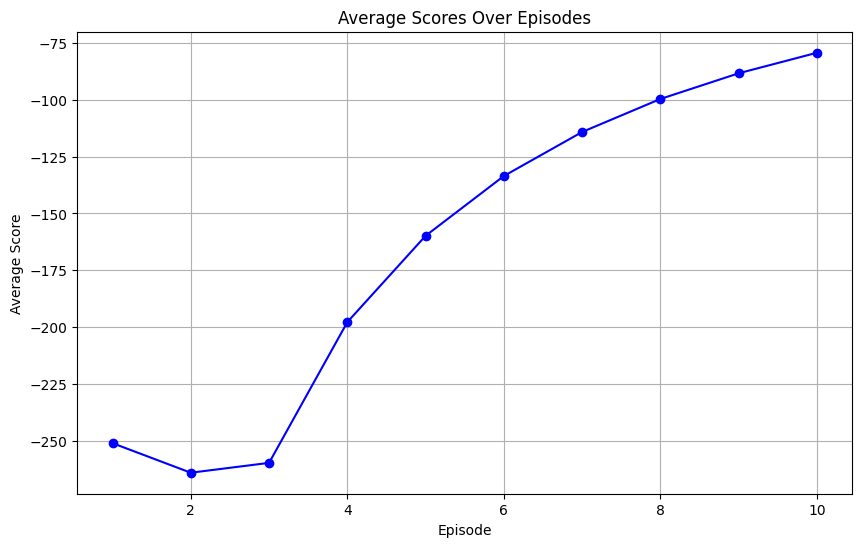

In [46]:
# plot the average score per episode
import matplotlib.pyplot as plt

episodes = list(range(1, n_games + 1))

plt.figure(figsize=(10, 6))
plt.plot(episodes, avg_scores, marker='o', linestyle='-', color='b', label='Average Score per Episode')
plt.title('Average Scores Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()
